In [ ]:
#Importation des libairies nécéssaires pour l'étude

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split



In [ ]:
#Importation du dataset des logements de Boston from sklearn.datasets et on l'affiche

from sklearn.datasets import load_boston
boston = load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [ ]:
boston.keys()

In [ ]:
boston.data

In [ ]:
boston.target

In [ ]:
boston.feature_names

In [ ]:
#La description des différentes variables à étudier et du boston house data set 
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

##Convertir data en un dataframe Pandas

In [ ]:
df=pd.DataFrame(boston.data, columns=boston.feature_names) #Conversion de la data en un dataframe avec le nom des colonnes appropriées
df.head() #Affichage du dataframe
#df.head affiche les 5 premiéres lignes du dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df.tail()
#df.tail affiche les 5 dernières lignes du dataframe

In [ ]:
df.tail(10)
#df.tail affiche les 10 dernières lignes du dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [ ]:
df.shape
#Affiche le format du data frame, 506 lignes et 13 colonnes

(506, 13)

In [ ]:
dfB=df.drop(['B'],axis=1)
print(dfB) #Vu qu'on a pas besoin de la variable B on l'enleve du Dataframe, dfB = copie du dataframe initial sans la colonne B

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO  LSTAT  
0       15.3   4.98  
1       17.8   9.14  
2       17.8   4.03  
3       18.

In [ ]:
dfTarget=pd.DataFrame(boston.target, columns=["Price"]) #Conversion de la data en un dataframe avec le nom des colonnes appropriées
dfTarget.head() #Affichage du dataframe
#df.head affiche les 5 premiéres lignes du dataframe


,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [ ]:
dfB.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33


In [ ]:
print(dfTarget) 

        0
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
..    ...
501  22.4
502  20.6
503  23.9
504  22.0
505  11.9

[506 rows x 1 columns]


In [ ]:
dfB.shape

(506, 12)

### Vérification des data types

In [ ]:
dfB.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
LSTAT      float64
dtype: object

In [ ]:
dfB.isnull().sum() #On a checké si il y a des valeurs nulles, si il y avait des valeurs nulles on aurait eu des problèmes durant l'analyse de données

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
dtype: int64

##Partie 2 

# Calcul des mesures statistiques

In [ ]:
dfB.describe().T #Calcul des mesures statistiques

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


#Histogrammes

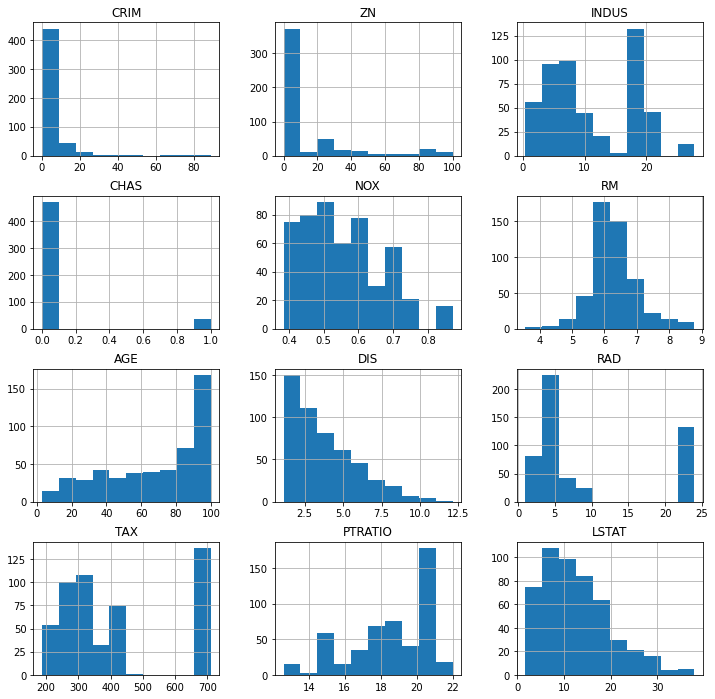

In [ ]:
dfB.hist(figsize=(12,12));

#Boxplot (boîtes à moustaches)

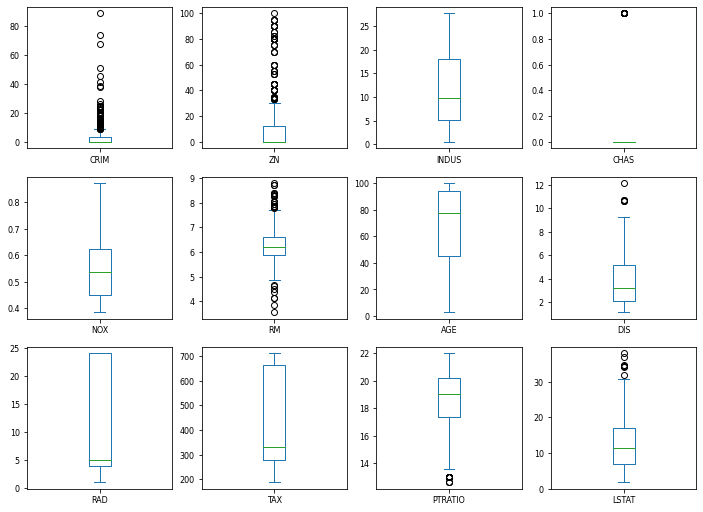

In [ ]:
dfB.plot(kind='box', subplots=True, layout=(4,4), fontsize=8, figsize=(12,12));
#On remarque qu'il y a beaucoup d'outliers pour les variables ZN, CRIM, RM, LSTAT, PTRATIO

## Corrélation entre les variables 

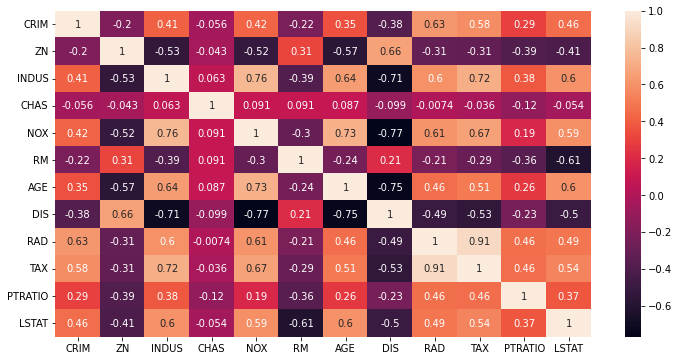

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(dfB.corr(), annot=True)

#Les variables qui prédisent les prix des maisons sont PTRATIO, TAX, RAD, AGE, NOX, INDUS et CRIM

In [ ]:
dfA=pd.concat([dfB, dfTarget],axis=1)
dfA
dfA.corr()['Price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

On remarque une corrélation négative proches de -1 dans les variables telles que : INDUS, LSTAT, PTRATIO, TAX ce qui veut dire que si ces variables augmentent le prix des maisons va baisser. 

Par ailleurs, la corrélation positive proche de 1 est présente dans les variables : RM et ZN, ce qui veut dire que si ces variables augmentent les prix des maisons va augmenter. C'est la corrélation de Pearson .

## Partie III

In [ ]:
dfTarget.max()

Price    50.0
dtype: float64

Vu que la valeur maximale de target (le prix) est de 50, j'ai divisé les logements en trois.
Poors = entre 0 et 16
Medians = entre 16 et 39
Expensives = entre 39 et 50





##Division des Logements

In [ ]:
#Question 1 - Division des logments 
dfA['Division'] = 0
dfA.loc[(dfA['Price'] > 16) & (dfA['Price'] <= 39), 'Division'] = 1
dfA.loc[dfA['Price'] > 39, 'Division'] = 2
dfA.head()

dfA
dfPoors = dfA[dfA['Price'] <= 16]
dfMedians = dfA[(dfA['Price'] <= 39) & (dfA['Price'] > 16)]
dfExpensives = dfA[(dfA['Price'] > 39) & (dfA['Price'] <=50)]

In [ ]:
dfPoors

In [ ]:
dfMedians

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9


In [ ]:
dfExpensives

# Visualisation des logements

## Nuage de Points *2D* 

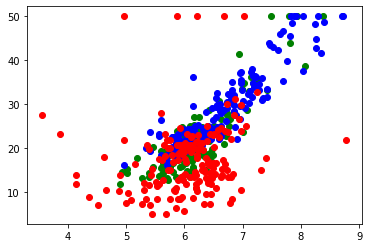

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = boston.data[:,5]
dfPoors, dfMedians, dfExpensives= np.array_split(x, 3)
y=boston.target
first, second, third= np.array_split(y, 3)
plt.scatter(dfPoors ,first, color='green')
plt.scatter(dfMedians , second, color='blue')
plt.scatter(dfExpensives , third, color='red')

## Nuage de Points *3D* 

In [ ]:
import plotly.express as px

w=boston.data[:,4]
w=np.sort(w)
first1, second2, third3= np.array_split(w, 3)
                                              

fig= px.scatter_3d(x = dfPoors, y= first, z = first1)
  
fig=px.scatter_3d(x = dfMedians, y = second, z = second2)

fig=px.scatter_3d(x = dfExpensives, y = third, z = third3)

fig.show()




*   Les 3 catégories de logments sont distribuées d'une maniére linéare selon le scatter plot qu'on a fait.


## Régression Linéaire

0.7406426641094095


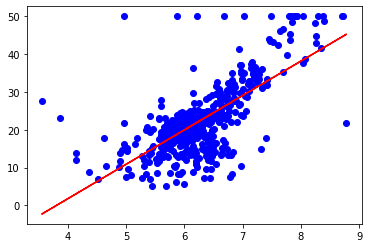

In [ ]:
from scipy import stats

def predict(x):
   return slope * x + intercept

x=boston.data[:,5]
y=boston.target
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

model = LinearRegression().fit(boston.data, y)
print(model.score(boston.data, y))

fitLine = predict(x)
plt.scatter(boston.data[:,5], boston.target, color="blue")
plt.plot(x, fitLine, c='r')


*   Dans ce graphe, il est clair qu'il un pattern linéaire. Plus le nombre moyen de pièces par logement est élevé, plus la valeur médiane est chère.


